In [93]:
#!pip install pandas matplotlib seaborn wordcloud nltk scikit-learn

In [94]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from collections import Counter
from nltk.util import ngrams
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Laden der notwendigen Ressourcen
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# CSV-Datei laden
df = pd.read_csv('data/movies_2015_2023_cleaned.csv')


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [95]:
# Stoppwörter laden
stop_words = set(stopwords.words('english')).union(set(stopwords.words('german')))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Funktion zur Textbereinigung
def preprocess_text(text):
    # Entferne HTML-Tags, URLs, Zahlen und Sonderzeichen
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower().strip()
    
    # Tokenisierung
    words = text.split()
    
    # Entfernen von Stoppwörtern
    words = [word for word in words if word not in stop_words]
    
    # Stemming
    stemmed_words = [stemmer.stem(word) for word in words]
    
    # Lemmatization
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    
    return ' '.join(lemmatized_words)

# Preprocessing auf die 'overview'-Spalte anwenden
df['cleaned_overview'] = df['overview'].dropna().apply(preprocess_text)

# Speichern der vorbereiteten Daten
df.to_csv('data/movies_2015_2023_preprocessed.csv', index=False)


Häufigste Wörter: [('life', 2980), ('one', 1618), ('family', 1490), ('young', 1420), ('year', 1325), ('love', 1310), ('world', 1248), ('find', 1230), ('friend', 1222), ('story', 1187)]
Häufigste Bi-Gramme: [(('best', 'friend'), 241), (('year', 'old'), 234), (('young', 'woman'), 196), (('fall', 'love'), 192), (('one', 'day'), 189), (('high', 'school'), 134), (('tell', 'story'), 111), (('first', 'time'), 106), (('year', 'later'), 105), (('love', 'story'), 99)]


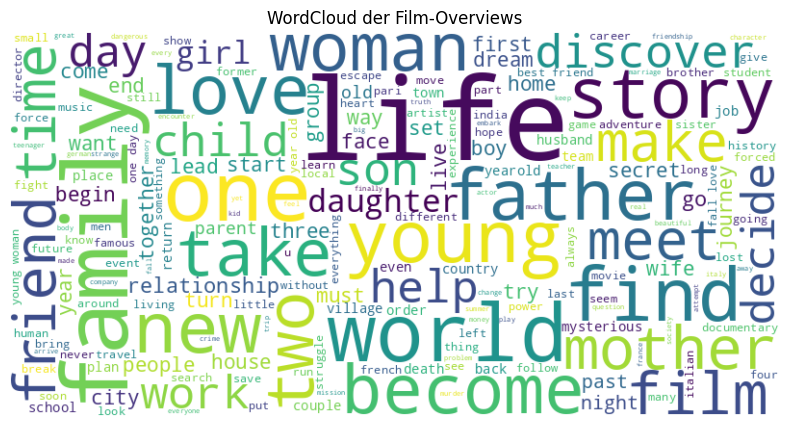

In [96]:

# Funktion zur Berechnung von N-Grammen
def get_ngrams(text, n=2):
    words = text.split()
    return list(ngrams(words, n))

# Berechnung und Visualisierung der häufigsten Wörter und Bi-Gramme
all_words = []
all_bigrams = []

for text in df['cleaned_overview']:
    all_words.extend(text.split())
    all_bigrams.extend(get_ngrams(text, 2))

# Häufigste Wörter
word_counts = Counter(all_words)
print("Häufigste Wörter:", word_counts.most_common(10))

# Häufigste Bi-Gramme
bigram_counts = Counter(all_bigrams)
print("Häufigste Bi-Gramme:", bigram_counts.most_common(10))

# WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud der Film-Overviews')
plt.show()


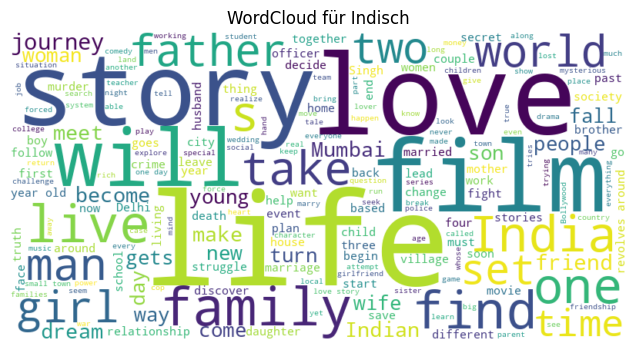

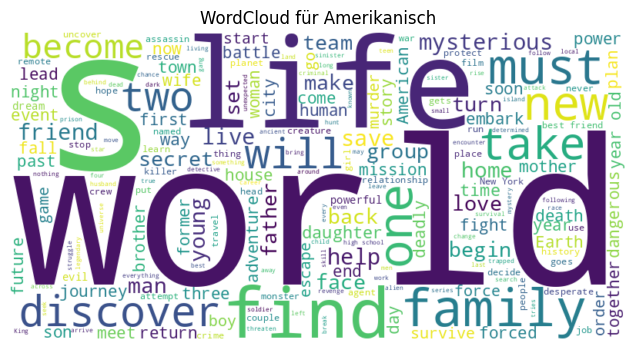

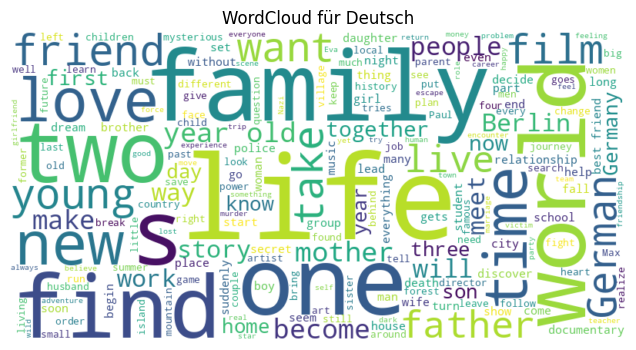

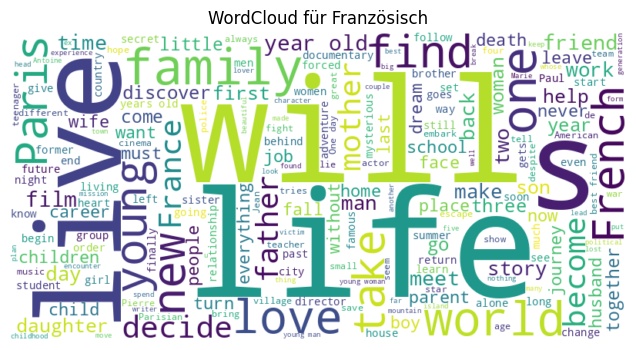

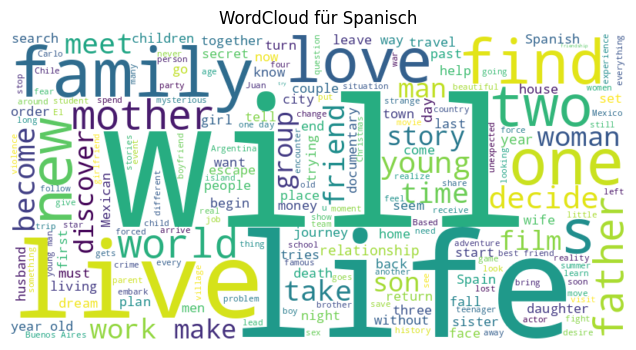

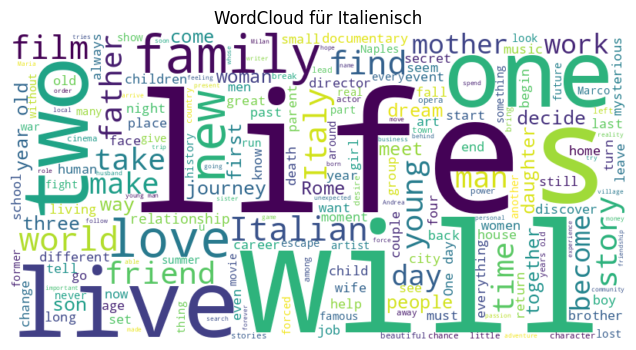

In [97]:
# Funktion zur Erstellung einer WordCloud für eine bestimmte Sprache
def create_wordcloud(language_data, language_name):
    text = ' '.join(language_data.dropna())  # Kombiniere alle Texte der Beschreibungen zu einem String
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # WordCloud anzeigen
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud für {language_name}')
    plt.show()

# Gruppiere die Daten nach Sprache und erstelle für jede Sprache eine WordCloud
languages = df['language'].unique()
for language in languages:
    language_data = df[df['language'] == language]['overview']
    create_wordcloud(language_data, language)



Anzahl der Filme pro Sprache:
language
Amerikanisch    1999
Indisch         1921
Französisch     1811
Spanisch        1800
Deutsch         1583
Italienisch     1465
Name: count, dtype: int64


/tmp/ipykernel_15690/1302301597.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.index, y=language_counts.values, palette='viridis')


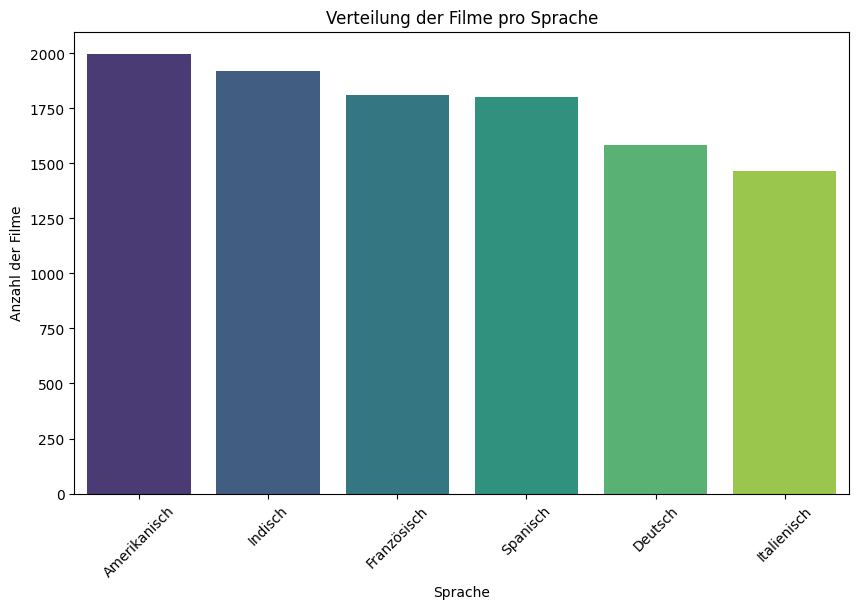

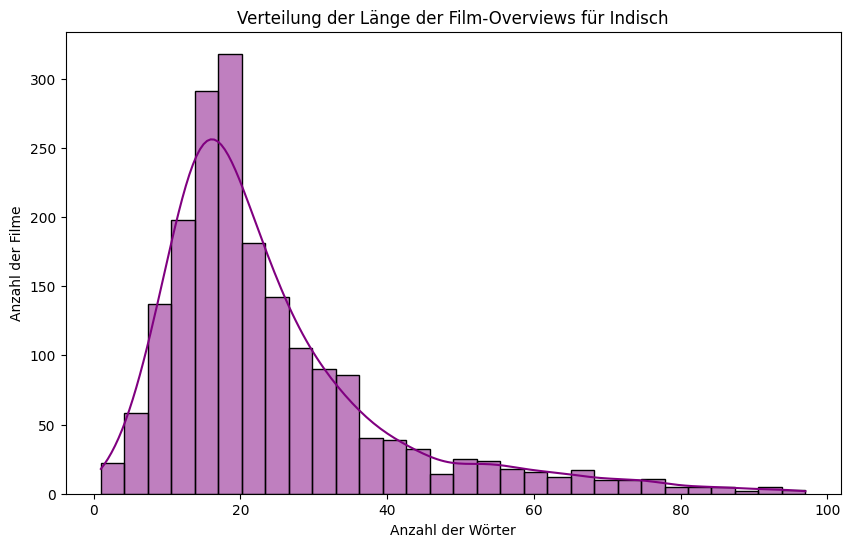

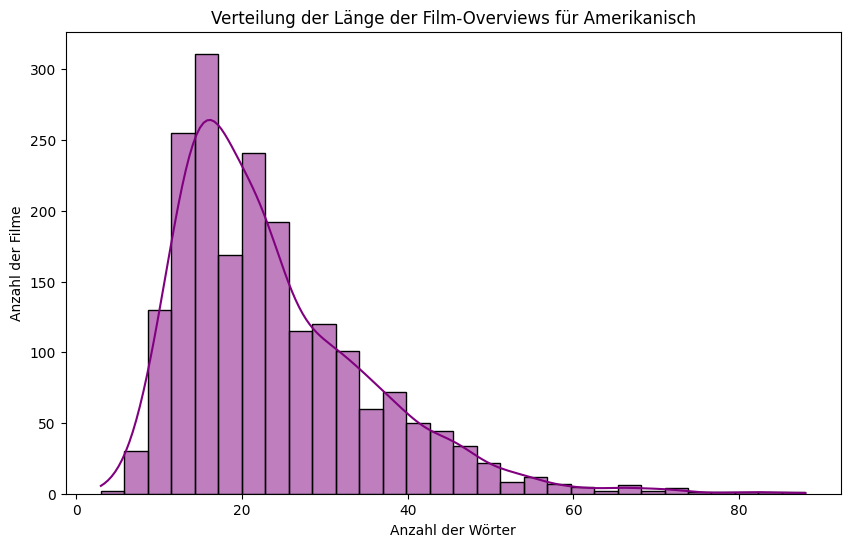

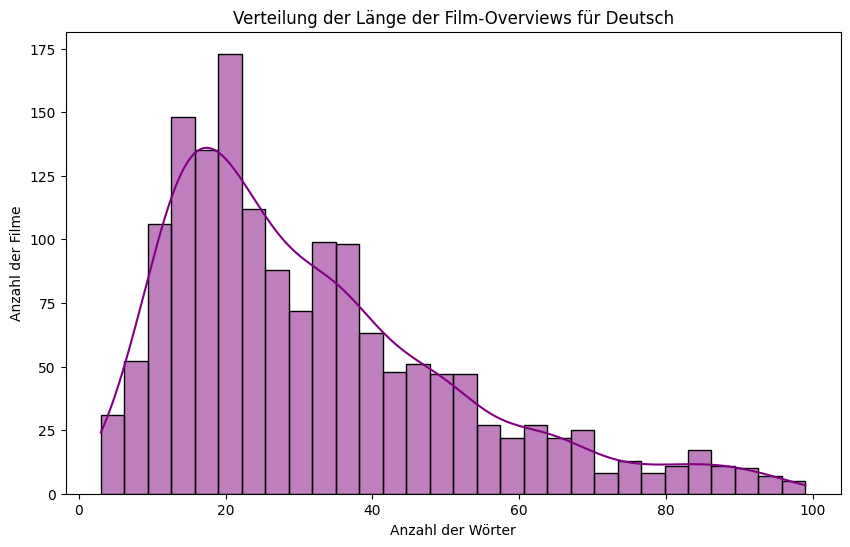

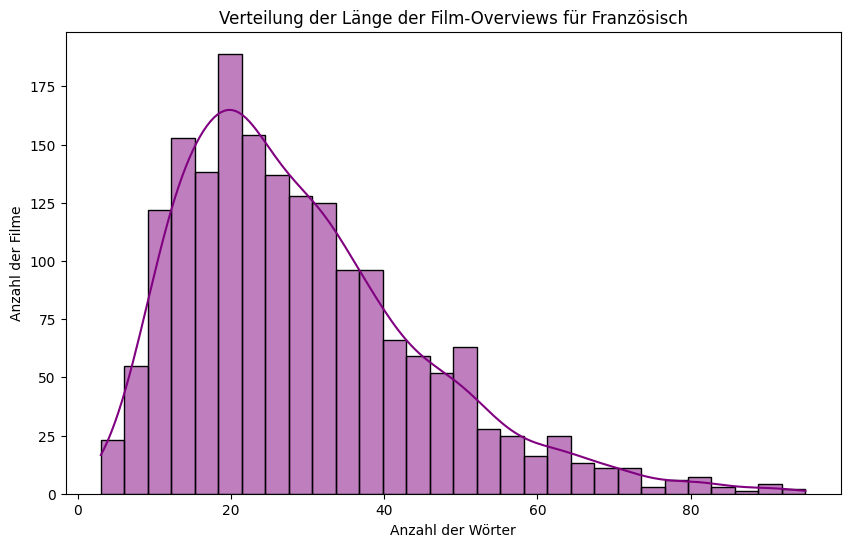

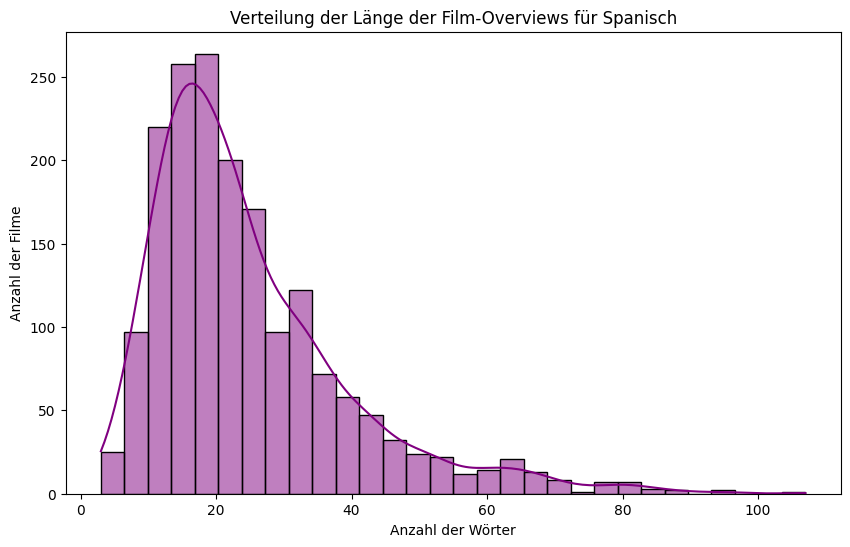

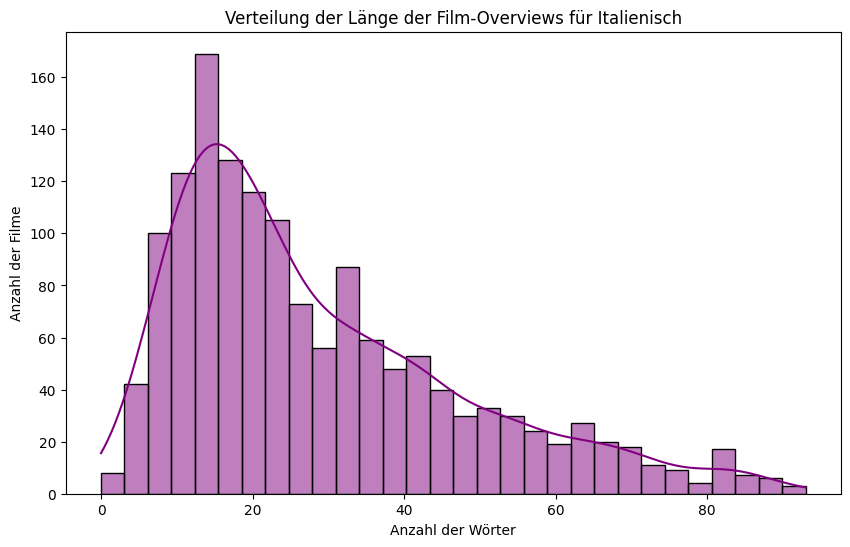

In [98]:
# Untersuchung der Klassenverteilung
language_counts = df['language'].value_counts()
print(f"\nAnzahl der Filme pro Sprache:\n{language_counts}")

# Visualisierung der Klassenverteilung
plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts.index, y=language_counts.values, palette='viridis')
plt.title('Verteilung der Filme pro Sprache')
plt.xlabel('Sprache')
plt.ylabel('Anzahl der Filme')
plt.xticks(rotation=45)
plt.show()

# Länge der Overviews berechnen
df['overview_length'] = df['cleaned_overview'].apply(lambda x: len(x.split()))

# Liste der Sprachen aus dem DataFrame
languages = df['language'].unique()

# Erstelle ein Histogramm für jede Sprache
for language in languages:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[df['language'] == language]['overview_length'], bins=30, kde=True, color='purple')
    plt.title(f'Verteilung der Länge der Film-Overviews für {language}')
    plt.xlabel('Anzahl der Wörter')
    plt.ylabel('Anzahl der Filme')
    plt.show()



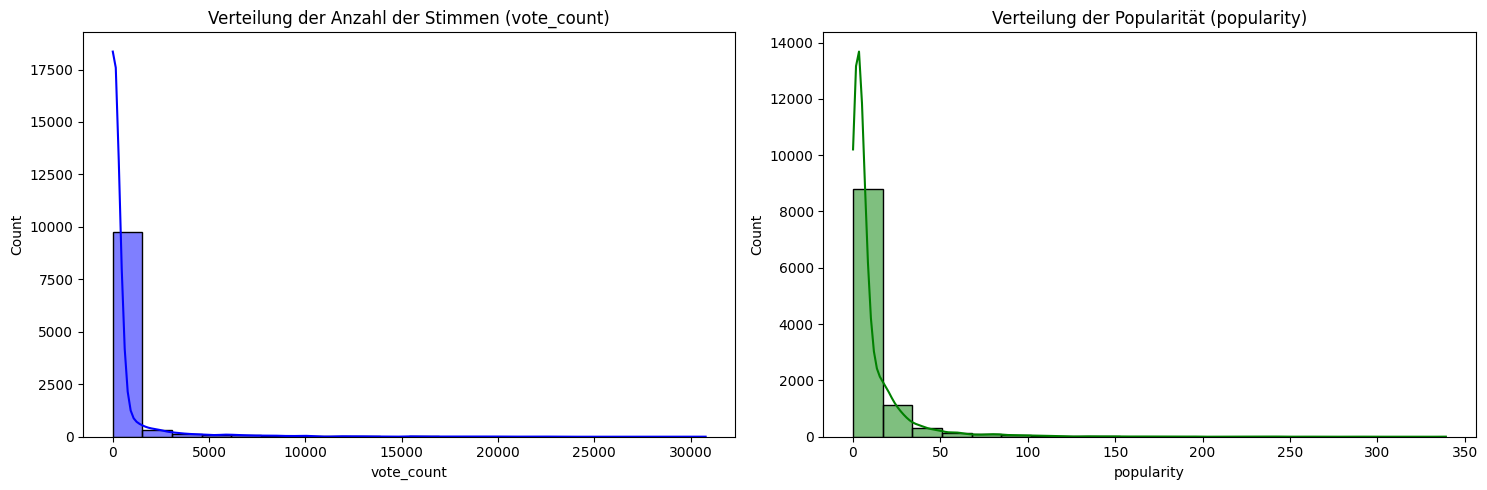

In [99]:

### 1. Erweiterte Statistik der numerischen Merkmale
# Verteilung der 'vote_count' und 'popularity' analysieren
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df['vote_count'], bins=20, ax=axes[0], kde=True, color='blue')
axes[0].set_title('Verteilung der Anzahl der Stimmen (vote_count)')

sns.histplot(df['popularity'], bins=20, ax=axes[1], kde=True, color='green')
axes[1].set_title('Verteilung der Popularität (popularity)')

plt.tight_layout()
plt.show()



In [100]:
# Statistische Zusammenfassung der numerischen Merkmale
numeric_summary = df[['vote_average', 'vote_count', 'popularity']].describe()
print("Statistische Zusammenfassung der numerischen Merkmale:\n", numeric_summary)



Statistische Zusammenfassung der numerischen Merkmale:
        vote_average    vote_count    popularity
count  10575.000000  10575.000000  10575.000000
mean       5.387880    502.751111     10.463949
std        2.508337   1847.426964     19.420977
min        0.000000      0.000000      0.067000
25%        5.000000      2.000000      1.926000
50%        6.100000     23.000000      4.216000
75%        6.900000    148.000000     10.417000
max       10.000000  30777.000000    339.140000


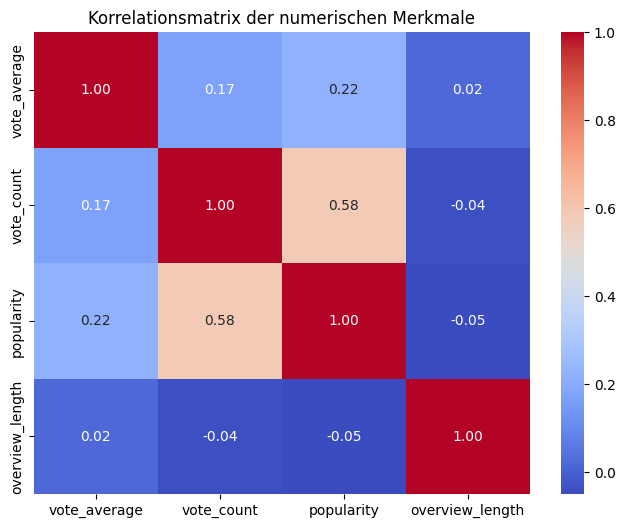

In [101]:
### 2. Korrelationen zwischen numerischen Merkmalen
correlation_matrix = df[['vote_average', 'vote_count', 'popularity', 'overview_length']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korrelationsmatrix der numerischen Merkmale')
plt.show()


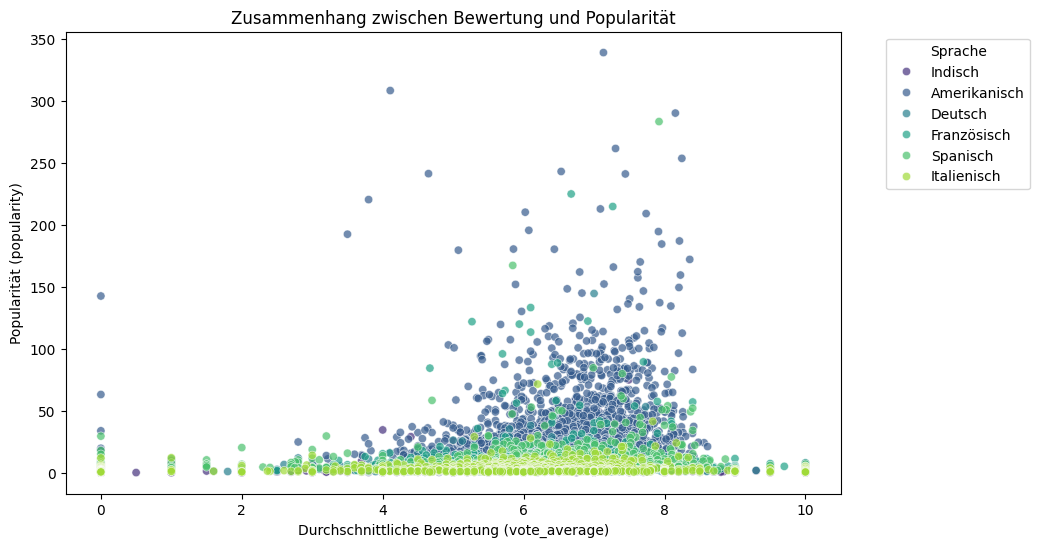

In [102]:
### 3. Verhältnis von Bewertungen zur Beliebtheit
# Scatterplot zwischen 'vote_average' und 'popularity'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vote_average', y='popularity', data=df, hue='language', palette='viridis', alpha=0.7)
plt.title('Zusammenhang zwischen Bewertung und Popularität')
plt.xlabel('Durchschnittliche Bewertung (vote_average)')
plt.ylabel('Popularität (popularity)')
plt.legend(title='Sprache', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [103]:
### 4. Untersuchung der häufigsten Wörter pro Sprache
# Funktion zur Zählung der häufigsten Wörter nach Sprache
def get_top_words_by_language(df, language, top_n=10):
    words = []
    for text in df[df['language'] == language]['cleaned_overview']:
        words.extend(text.split())
    word_counts = Counter(words)
    return word_counts.most_common(top_n)

# Analysiere die Top-Wörter für jede Sprache
languages = df['language'].unique()
top_words_by_language = {}
for language in languages:
    top_words_by_language[language] = get_top_words_by_language(df, language)
    print(f"\nTop-Wörter für {language}:")
    print(top_words_by_language[language])


Top-Wörter für Indisch:
[('life', 609), ('story', 393), ('love', 374), ('film', 354), ('family', 265), ('one', 245), ('get', 232), ('india', 227), ('find', 211), ('girl', 192)]

Top-Wörter für Amerikanisch:
[('life', 335), ('world', 304), ('new', 277), ('find', 275), ('family', 265), ('must', 258), ('young', 234), ('one', 218), ('friend', 211), ('take', 182)]

Top-Wörter für Deutsch:
[('life', 438), ('one', 272), ('family', 241), ('friend', 230), ('world', 220), ('young', 219), ('year', 217), ('get', 210), ('two', 200), ('time', 198)]

Top-Wörter für Französisch:
[('life', 589), ('one', 332), ('year', 321), ('young', 318), ('family', 260), ('love', 233), ('new', 224), ('world', 218), ('friend', 217), ('woman', 215)]

Top-Wörter für Spanisch:
[('life', 517), ('one', 273), ('year', 263), ('family', 250), ('young', 244), ('love', 206), ('friend', 205), ('woman', 200), ('find', 186), ('two', 180)]

Top-Wörter für Italienisch:
[('life', 492), ('one', 278), ('year', 225), ('two', 223), ('yo

/tmp/ipykernel_15690/2464999593.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=selected_language_counts, y=selected_language_words, palette='coolwarm')


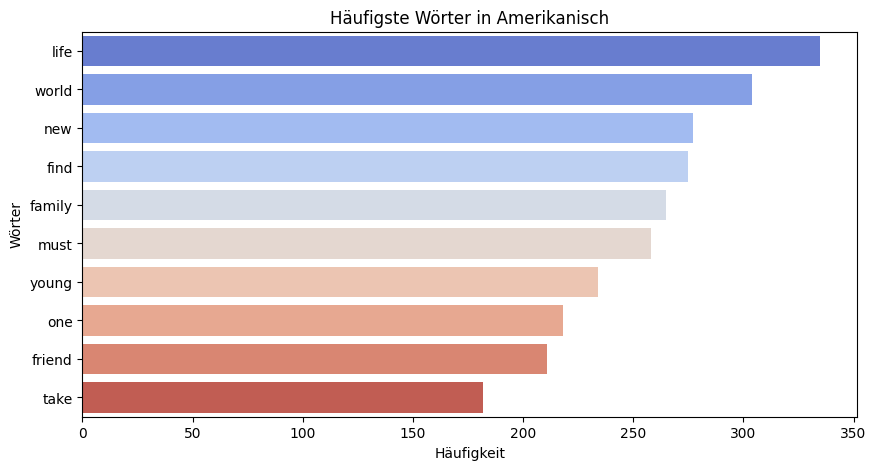

/tmp/ipykernel_15690/2464999593.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=selected_language_counts, y=selected_language_words, palette='coolwarm')


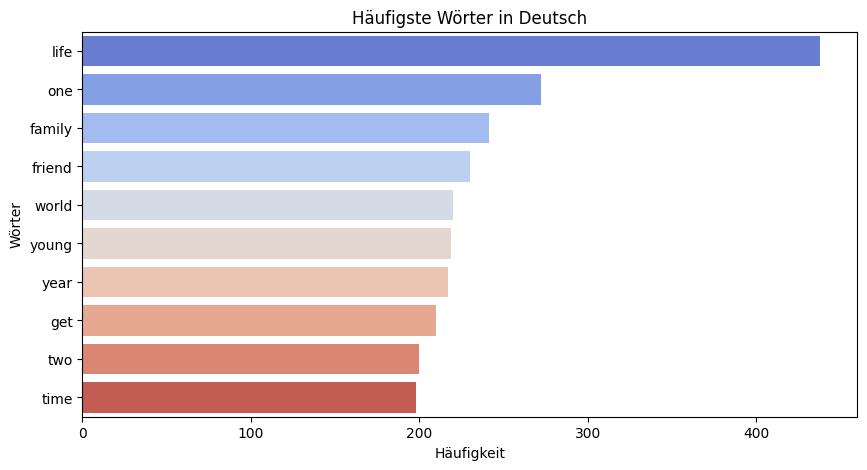

/tmp/ipykernel_15690/2464999593.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=selected_language_counts, y=selected_language_words, palette='coolwarm')


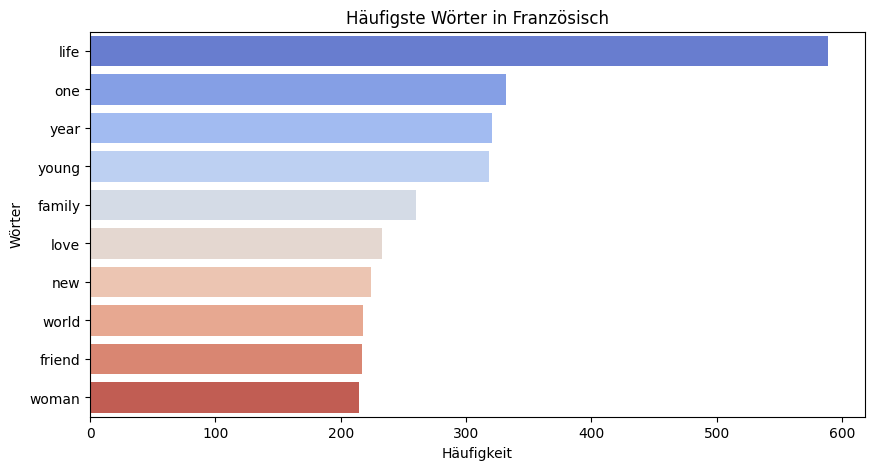

/tmp/ipykernel_15690/2464999593.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=selected_language_counts, y=selected_language_words, palette='coolwarm')


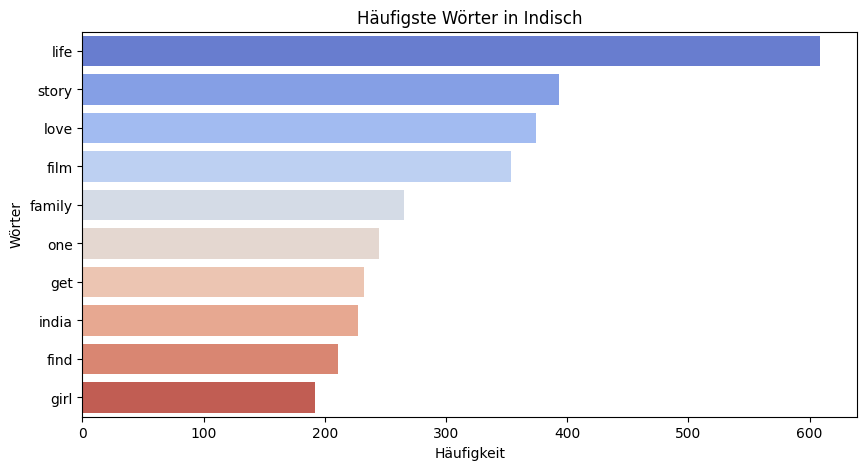

/tmp/ipykernel_15690/2464999593.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=selected_language_counts, y=selected_language_words, palette='coolwarm')


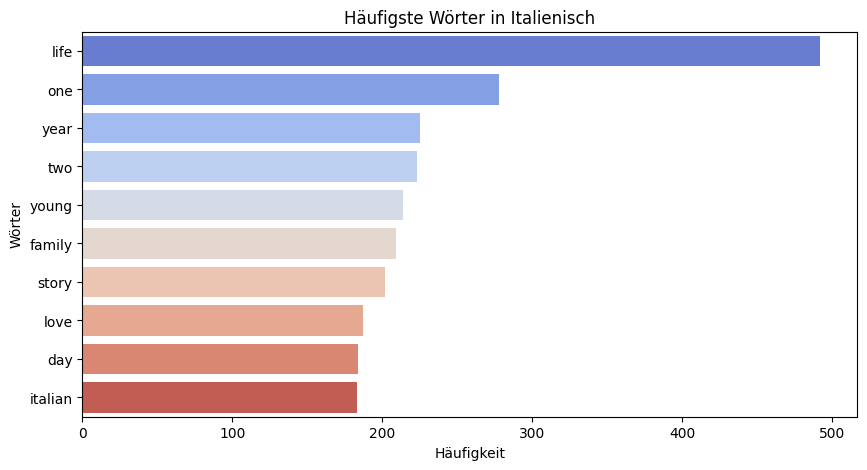

/tmp/ipykernel_15690/2464999593.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=selected_language_counts, y=selected_language_words, palette='coolwarm')


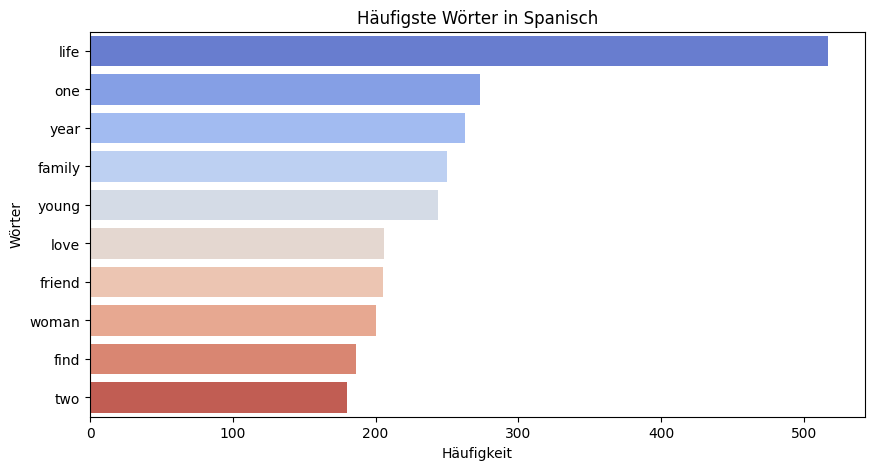

/tmp/ipykernel_15690/2464999593.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_length_by_language.index, y=average_length_by_language.values, palette='magma')


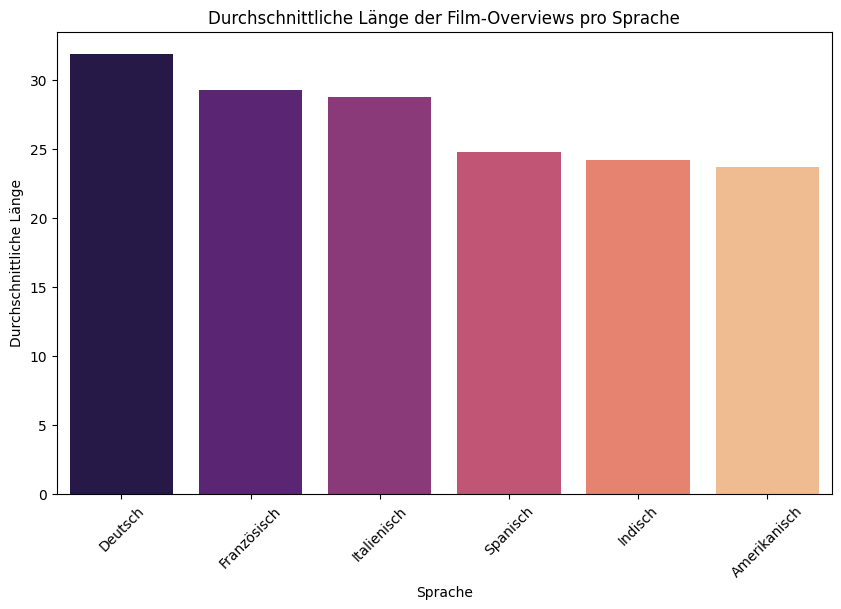

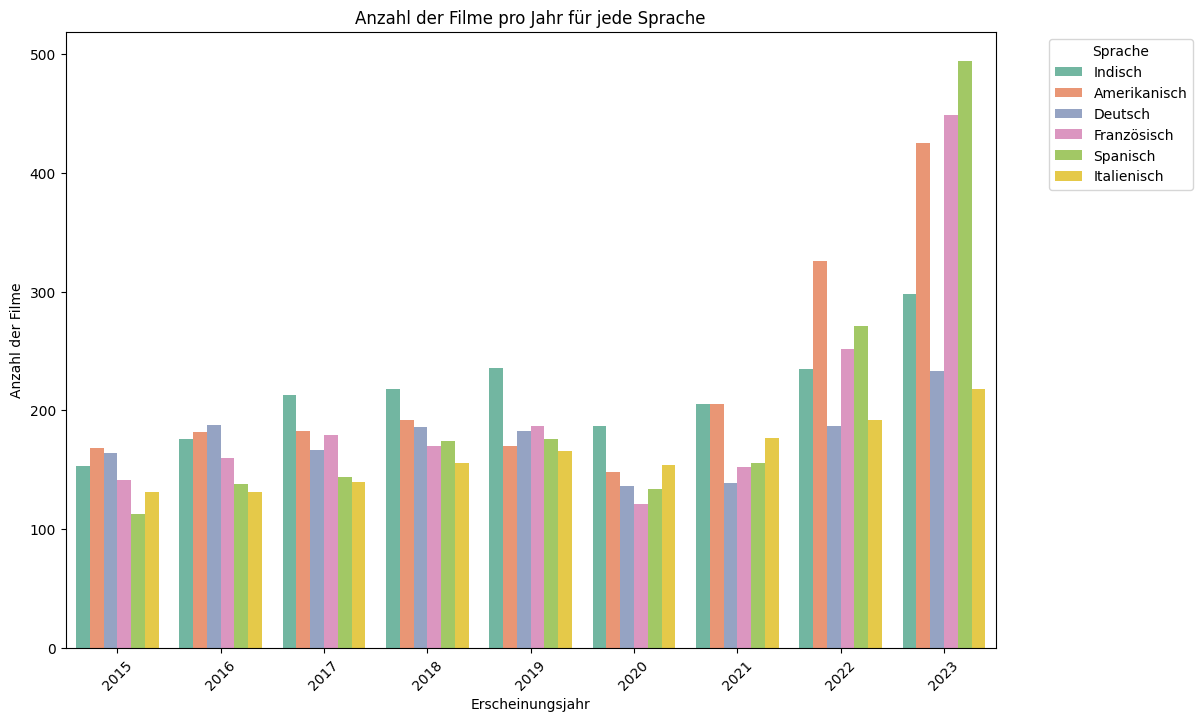

In [104]:
# Visualisierung der Top-Wörter pro Sprache
selected_language = 'Amerikanisch'
selected_language_words, selected_language_counts = zip(*top_words_by_language[selected_language])
plt.figure(figsize=(10, 5))
sns.barplot(x=selected_language_counts, y=selected_language_words, palette='coolwarm')
plt.title(f'Häufigste Wörter in {selected_language}')
plt.xlabel('Häufigkeit')
plt.ylabel('Wörter')
plt.show()

selected_language = 'Deutsch'
selected_language_words, selected_language_counts = zip(*top_words_by_language[selected_language])
plt.figure(figsize=(10, 5))
sns.barplot(x=selected_language_counts, y=selected_language_words, palette='coolwarm')
plt.title(f'Häufigste Wörter in {selected_language}')
plt.xlabel('Häufigkeit')
plt.ylabel('Wörter')
plt.show()

selected_language = 'Französisch'
selected_language_words, selected_language_counts = zip(*top_words_by_language[selected_language])
plt.figure(figsize=(10, 5))
sns.barplot(x=selected_language_counts, y=selected_language_words, palette='coolwarm')
plt.title(f'Häufigste Wörter in {selected_language}')
plt.xlabel('Häufigkeit')
plt.ylabel('Wörter')
plt.show()

selected_language = 'Indisch'
selected_language_words, selected_language_counts = zip(*top_words_by_language[selected_language])
plt.figure(figsize=(10, 5))
sns.barplot(x=selected_language_counts, y=selected_language_words, palette='coolwarm')
plt.title(f'Häufigste Wörter in {selected_language}')
plt.xlabel('Häufigkeit')
plt.ylabel('Wörter')
plt.show()

selected_language = 'Italienisch'
selected_language_words, selected_language_counts = zip(*top_words_by_language[selected_language])
plt.figure(figsize=(10, 5))
sns.barplot(x=selected_language_counts, y=selected_language_words, palette='coolwarm')
plt.title(f'Häufigste Wörter in {selected_language}')
plt.xlabel('Häufigkeit')
plt.ylabel('Wörter')
plt.show()

selected_language = 'Spanisch'
selected_language_words, selected_language_counts = zip(*top_words_by_language[selected_language])
plt.figure(figsize=(10, 5))
sns.barplot(x=selected_language_counts, y=selected_language_words, palette='coolwarm')
plt.title(f'Häufigste Wörter in {selected_language}')
plt.xlabel('Häufigkeit')
plt.ylabel('Wörter')
plt.show()

### 5. Unterschiede in der Übersichtslänge nach Sprache
# Durchschnittliche Länge der Overviews pro Sprache berechnen
average_length_by_language = df.groupby('language')['overview_length'].mean().sort_values(ascending=False)

# Visualisierung der durchschnittlichen Länge der Overviews pro Sprache
plt.figure(figsize=(10, 6))
sns.barplot(x=average_length_by_language.index, y=average_length_by_language.values, palette='magma')
plt.title('Durchschnittliche Länge der Film-Overviews pro Sprache')
plt.xlabel('Sprache')
plt.ylabel('Durchschnittliche Länge')
plt.xticks(rotation=45)
plt.show()

### 6. Verhältnis der Anzahl der Filme pro Jahr und Sprache
plt.figure(figsize=(12, 8))
sns.countplot(x='release_year', hue='language', data=df, palette='Set2')
plt.title('Anzahl der Filme pro Jahr für jede Sprache')
plt.xlabel('Erscheinungsjahr')
plt.ylabel('Anzahl der Filme')
plt.xticks(rotation=45)
plt.legend(title='Sprache', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [105]:
# One-Hot-Encoding der Sprache (Zielvariable)
df = pd.get_dummies(df, columns=['language'])
df

,title,release_year,overview,vote_average,vote_count,popularity,cleaned_overview,overview_length,language_Amerikanisch,language_Deutsch,language_Französisch,language_Indisch,language_Italienisch,language_Spanisch
0,Uri: The Surgical Strike,2019,Following the roguish terrorist attacks at Uri...,7.067,420.0,49.212,following roguish terrorist attack uri army ba...,24,False,False,False,True,False,False
1,Attack,2022,"With the Parliament under siege, India’s first...",6.735,204.0,58.312,parliament siege india first super soldier arj...,23,False,False,False,True,False,False
2,Jawan,2023,"An emotional journey of a prison warden, drive...",7.200,241.0,61.035,emotional journey prison warden driven persona...,28,False,False,False,True,False,False
3,Tumbbad,2018,"India, 1918. On the outskirts of Tumbbad, a cu...",7.492,241.0,74.908,india outskirt tumbbad cursed village always r...,22,False,False,False,True,False,False
4,Animal,2023,The hardened son of a powerful industrialist r...,6.466,104.0,57.331,hardened son powerful industrialist return hom...,15,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10574,Odissea nell'ospizio,2019,Four sixty-something disgraced comedians - who...,5.500,1.0,0.505,four sixtysomething disgraced comedian used wo...,17,False,False,False,False,True,False
10575,Walls,2023,"For her debut film, model-actor turned filmmak...",6.100,4.0,1.052,debut film modelactor turned filmmaker kasia s...,22,False,False,False,False,True,False
10576,L'ultima bottega,2023,An almost eighty -year -old man works in his w...,0.000,0.0,0.503,almost eighty year old work workshop made cera...,31,False,False,False,False,True,False
10577,When Nuvolari Runs: The Flying Mantuan,2018,Tazio Giorgio Nuvolari (16 November 1892 - 11 ...,5.667,6.0,1.063,tazio giorgio nuvolari november august italian...,33,False,False,False,False,True,False


In [106]:
from sklearn.feature_extraction.text import CountVectorizer

# Bag-of-Words Modell
bow_vectorizer = CountVectorizer(max_features=5000)
X_bow = bow_vectorizer.fit_transform(df['cleaned_overview'])
X_bow

# N-Gramme (Bi-Gramme)
ngram_vectorizer = CountVectorizer(max_features=5000, ngram_range=(1, 2))
X_ngrams = ngram_vectorizer.fit_transform(df['cleaned_overview'])
X_ngrams

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 225506 stored elements and shape (10579, 5000)>

In [107]:
# TF-IDF Modell
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_overview'])
X_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 217222 stored elements and shape (10579, 5000)>